In [185]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
import math
from scipy import special
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import gridspec

px0=100; 
y0=0.5;
z0=0.0;

Nb=5.7;
tfin=Nb*(2*np.pi*np.sqrt(2*px0)); 

tstep=0.1;

Nt=np.int_(np.floor(tfin/tstep));

abeta=px0*y0/np.sqrt(2*px0); 
print("abeta = %7.2f\n"%abeta);

wr=2*px0*px0/np.sqrt(2*px0); 
print("wr = %7.2f\n  or %7.2f eV\n"%(wr,wr*1.24/0.8));

wc=3*abeta*px0*px0/np.sqrt(2*px0); 
print("wc = %7.2f\n  or %7.2f eV\n"%(wc,wc*1.24/0.8));

print("Nt = %d\n"%Nt);
print("dt = %7.2f\n"%tstep);

kb = 1/np.sqrt(2*px0)
width = 2*px0*px0/(1+abeta*abeta/2)*kb/Nb
print("line width = %7.2f\n  or %7.2f eV\n"%(width,width*1.24/0.8));

def SaveAsH5(rank):
    
    tt = np.arange(Nt)*tstep
    
    kb = 1/np.sqrt(2*px0)
    vx0 = px0/math.sqrt(1+px0*px0);
    
    py = kb*y0*np.cos(kb*tt)*px0
    yy =    y0*np.sin(kb*tt)
    
    pz = kb*z0*np.cos(kb*tt+np.pi/2)*px0
    zz =    z0*np.sin(kb*tt+np.pi/2)
    
    px = np.sqrt(px0*px0-1-py*py-pz*pz);
    xx = np.zeros(Nt)
    
    for i in np.arange(1,Nt,1):
        xx[i]=xx[i-1]+(px[i]+px[i-1])/2/px0*tstep
    
    f = h5.File('Traj_%d_.h5'%rank,'w')
    for p in np.arange(1):
        grp = f.create_group('%d'%p)
        dset = grp.create_dataset("xx", (Nt,),data=xx)
        dset = grp.create_dataset("yy", (Nt,),data=yy)
        dset = grp.create_dataset("zz", (Nt,),data=zz)
        dset = grp.create_dataset("px", (Nt,),data=px)
        dset = grp.create_dataset("py", (Nt,),data=py)
        dset = grp.create_dataset("pz", (Nt,),data=pz)
        dset = grp.create_dataset("weight",(1,),data=1.0) #how many real unit charges it represents 
        dset = grp.create_dataset("start", (1,),data=0) # starting time of trajectory
         
    f.close()
    
    
for i in range(4):
     SaveAsH5(i)

abeta =    3.54

wr = 1414.21
  or 2192.03 eV

wc = 7500.00
  or 11625.00 eV

Nt = 5064

dt =    0.10

line width =   34.22
  or   53.04 eV



In [ ]:
# # # # # # # # # # # # # # # # # # # # # 
# run
# # # # # # # # # # # # # # # # # # # # # 

In [1287]:
%%capture
rm Synchrotron_*.h5 ; make; mpiexec -n 4 SIRC 

In [1106]:
# # # # # # # # # # # # # # # # # # # # # 
# plot
# # # # # # # # # # # # # # # # # # # # # 

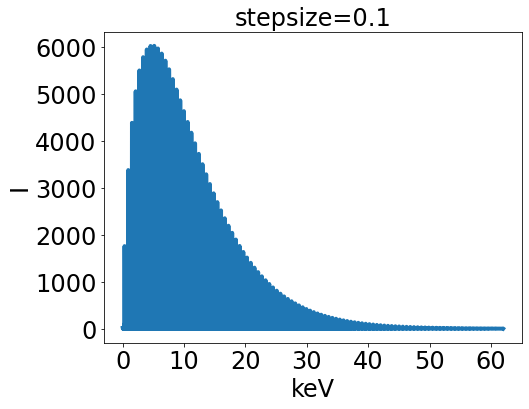

In [186]:
filename = 'Synchrotron_SIRC.h5'
hf = h5.File(filename, 'r')
eng = np.array(hf['Energy[eV]'])
I = np.array(hf['II'])
I=np.sum(np.sum(np.sum(I,1),1),1)

fig, ax = plt.subplots()
ax.plot(eng/1000, I, linewidth=4.0)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(24)
ax.set_xlabel('keV', fontsize=24)
ax.set_ylabel('I', fontsize=24)
fig.tight_layout()
fig.set_size_inches(8, 6)
# ax.set(ylim=(1,np.max(I)*2.1))
ax.set_title('stepsize=%s'%tstep, fontsize=24)
ax.patch.set_alpha(0.0)
# ax.set_yscale('log')
plt.show()

<ipython-input-181-58de17327031>:20: RuntimeWarning: invalid value encountered in multiply
  didw = xi*xi*np.square(special.kv(2/3,xi));


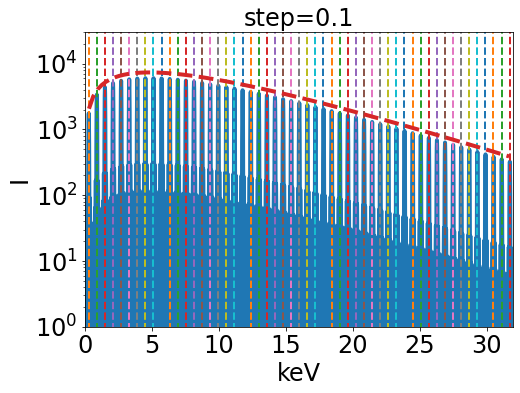

In [181]:
filename = 'Synchrotron_SIRC.h5'
hf = h5.File(filename, 'r')
eng = np.array(hf['Energy[eV]'])
I = np.array(hf['II'])
I=np.sum(np.sum(np.sum(I,1),1),1)


fig, ax = plt.subplots()
ax.plot(eng/1000, I, linewidth=4.0)

#plot harmonics
for i in np.arange(1,125,2):
    wn=i*2*px0*px0/(1+abeta*abeta/2)*kb/1000*1.239/0.8
    ax.plot(np.array([wn,wn]), np.array([0,2e7]),'--',linewidth=2.0)

w = np.arange(100)*0.32;
xi = (w/(wc/1000*1.239/0.8));

#plot asymptotic
didw = xi*xi*np.square(special.kv(2/3,xi));
ax.plot(w, 2.0e4*didw,'--', linewidth=4.0)


for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(24)
ax.set_xlabel('keV', fontsize=24)
ax.set_ylabel('I', fontsize=24)
fig.tight_layout()
fig.set_size_inches(8, 6)
ax.set(xlim=(0,32))
ax.set(ylim=(1,np.max(I)*5.))
ax.set_title('step=%s'%tstep, fontsize=24)
ax.patch.set_alpha(0.0)
ax.set_yscale('log')
plt.show()

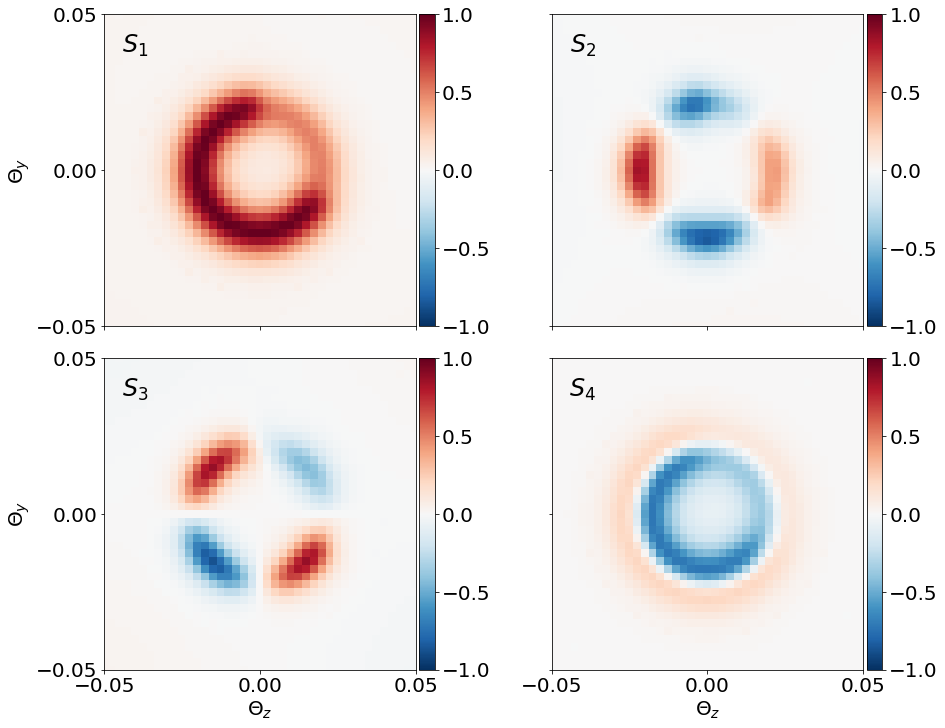

In [30]:
# plot the space distribution
# 

filename = 'Synchrotron_SIRC.h5'
hf = h5.File(filename, 'r')
eng = np.array(hf['Energy[eV]'])
ThetaY = np.array(hf['ThetaY'])
ThetaZ = np.array(hf['ThetaZ'])
S1 = np.array(hf['S1'])
S2 = np.array(hf['S2'])
S3 = np.array(hf['S3'])
S4 = np.array(hf['S4'])
I  = np.array(hf['II'])

S1.shape

Ss1 = np.sum(S1[:,:,:,0],0)
Ss2 = np.sum(S2[:,:,:,0],0)
Ss3 = np.sum(S3[:,:,:,0],0)
Ss4 = np.sum(S4[:,:,:,0],0)
Nor = np.max(Ss1)
SS=[Ss1/Nor,Ss2/Nor,Ss3/Nor, Ss4/Nor]

color_map = plt. cm. get_cmap('RdBu')
reversed_color_map = color_map. reversed()

fig, axs = plt.subplots(nrows=2, ncols=2, constrained_layout=True)

idx =0;
for ax in axs.flat:
    im2 = ax.pcolor(ThetaZ,ThetaY,SS[idx],shading='auto', cmap=reversed_color_map, vmin=-1, vmax=1)
    
    zmax = np.max(ThetaZ)
    ymax = np.max(ThetaY)
    
    ax.set(xlim=(-zmax,zmax), xticks=np.arange(-zmax,zmax*1.1,zmax))
    ax.set(ylim=(-ymax,ymax), yticks=np.arange(-ymax,ymax*1.1,ymax))
    if math.floor(idx/2)==0:
        ax.xaxis.set_ticklabels([])
    else:
        ax.set_xlabel('$\Theta_z$', fontsize=20)
    if idx%2==1:
        ax.yaxis.set_ticklabels([])
    else:
        ax.set_ylabel('$\Theta_y$', fontsize=20)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(20)
        
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar=plt.colorbar(im2, cax=cax)
    cbar.ax.tick_params(labelsize=20) 
    for t in cbar.ax.get_yticklabels():
        t.set_fontsize(20)
    idx=idx+1
    ax.set_aspect('equal')
    ax.text(0.1, 0.9, '$S_%s$'%idx, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=24)
    
fig.set_size_inches(13, 10)
plt.show()
    

In [ ]:
# Prepare data with Cubic Interp

In [176]:
from scipy.interpolate import interp1d

px0=100; 
y0=0.5;
z0=0.0;

Nb=5.7;
tfin=Nb*(2*np.pi*np.sqrt(2*px0)); 

tstep=1;

interp=20;

Nt=np.int_(np.floor(tfin/tstep));

abeta=px0*y0/np.sqrt(2*px0); 
print("abeta = %7.2f\n"%abeta);

wr=2*px0*px0/np.sqrt(2*px0); 
print("wr = %7.2f\n  or %7.2f eV\n"%(wr,wr*1.24/0.8));

wc=3*abeta*px0*px0/np.sqrt(2*px0); 
print("wc = %7.2f\n  or %7.2f eV\n"%(wc,wc*1.24/0.8));

print("Nt = %d\n"%Nt);
print("dt = %7.2f\n"%tstep);

kb = 1/np.sqrt(2*px0)
width = 2*px0*px0/(1+abeta*abeta/2)*kb/Nb
print("line width = %7.2f\n  or %7.2f eV\n"%(width,width*1.24/0.8));

tt = np.arange(Nt)*tstep
#finer time
tt_f = np.arange((Nt-1)*interp)*tstep/interp
Ikind ='quadratic'
print("Nt(Fine) = %d\n"%tt_f.shape[0])

def SaveAsH5(rank):
    
    
    
    kb = 1/np.sqrt(2*px0)
    vx0 = px0/math.sqrt(1+px0*px0);
    
    py = kb*y0*np.cos(kb*tt)*px0
    yy =    y0*np.sin(kb*tt)
    
    pz = kb*z0*np.cos(kb*tt+np.pi/2)*px0
    zz =    z0*np.sin(kb*tt+np.pi/2)
    
    px = np.sqrt(px0*px0-1-py*py-pz*pz);
    xx = np.zeros(Nt)
    
    for i in np.arange(1,Nt,1):
        xx[i]=xx[i-1]+(px[i]+px[i-1])/2/px0*tstep
    
   
    f = h5.File('Traj_%d_.h5'%rank,'w')
    for p in np.arange(1):
        grp = f.create_group('%d'%p)
        
        f2 = interp1d(tt, xx, kind=Ikind)
        dset = grp.create_dataset("xx", (tt_f.shape[0],),data=f2(tt_f))
        
        f2 = interp1d(tt, yy, kind=Ikind)
        dset = grp.create_dataset("yy", (tt_f.shape[0],),data=f2(tt_f))
        
        f2 = interp1d(tt, zz, kind=Ikind)
        dset = grp.create_dataset("zz", (tt_f.shape[0],),data=f2(tt_f))
        
        f2 = interp1d(tt, px, kind=Ikind)
        dset = grp.create_dataset("px", (tt_f.shape[0],),data=f2(tt_f))
        
        f2 = interp1d(tt, py, kind=Ikind)
        dset = grp.create_dataset("py", (tt_f.shape[0],),data=f2(tt_f))
        
        f2 = interp1d(tt, pz, kind=Ikind)
        dset = grp.create_dataset("pz", (tt_f.shape[0],),data=f2(tt_f))
        
        dset = grp.create_dataset("weight",(1,),data=1.0) #how many real unit charges it represents 
        dset = grp.create_dataset("start", (1,),data=0) # starting time of trajectory
         
    f.close()
    
    
for i in range(4):
     SaveAsH5(i)
        


abeta =    3.54

wr = 1414.21
  or 2192.03 eV

wc = 7500.00
  or 11625.00 eV

Nt = 506

dt =    1.00

line width =   34.22
  or   53.04 eV

Nt(Fine) = 10100

